In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [4]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [6]:
# Extract open values for the dataset
train = dataset_train.loc[:, ["Open"]].values


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
train_scaled = scaler.fit_transform(train)


In [8]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
train_scaled = scaler.fit_transform(train)


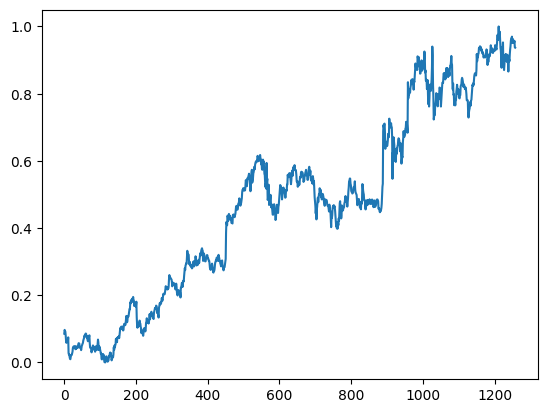

In [9]:
plt.plot(train_scaled)
plt.show()

RNN Portion

In [10]:
# Creating a data structure with 50 timesteps and 1 output
X_train = []
y_train = []
timesteps = 50
for i in range(timesteps, 1258):
    X_train.append(train_scaled[i-timesteps:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [11]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [20]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN


In [21]:
# Initialising the RNN
regressor = Sequential()


In [22]:
# Adding the first RNN layer
regressor.add(SimpleRNN(units = 50, activation='tanh', input_shape = (X_train.shape[1], 1)))


In [24]:
regressor.add(Dense(units = 1))

regressor.compile(optimizer ='adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0665
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0011
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 6.5224e-04
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 5.2057e-04
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.5302e-04
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.7159e-04
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.8058e-04
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.3823e-04
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.1025e-04
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.9523e-04
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.0187e-04
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.2518e-04
Epoch 13/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.5625e-04
Epoch 14/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.2691e-04
Epoch 15/50
38/38 ━━━━━

# Complete the code to fit the model.
# Use optimizer = ‘adam’ and loss = ‘mean_squared_error’
# Use epochs = 50 and batch_size = 32


In [25]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.loc[:, ["Open"]].values
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - timesteps:].values.reshape(-1,1)
inputs = scaler.transform(inputs)  # min max scaler


In [26]:
X_test = []
for i in range(timesteps, 70):
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = predicted_stock_price.reshape((predicted_stock_price.shape[0], predicted_stock_price.shape[1])) # Reshape to (20, 50)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
predicted_stock_price = predicted_stock_price.reshape((predicted_stock_price.shape[0], predicted_stock_price.shape[1],1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


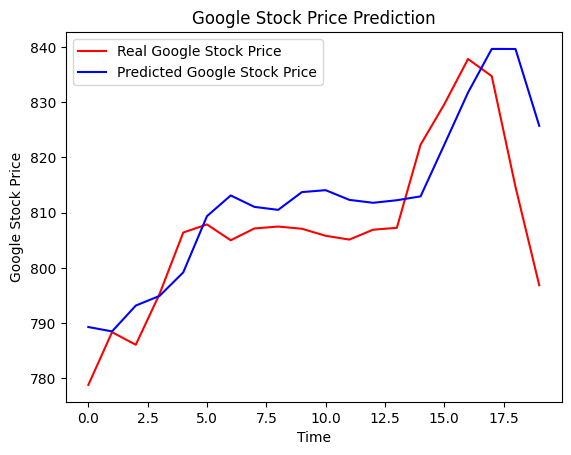

In [27]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price[:, 0], color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


In [28]:
regressor = Sequential()

# Adding the first RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))

# Adding a second RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))

# Adding a fourth RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 30, batch_size = 32)


Epoch 1/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0284
Epoch 2/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 0.0014
Epoch 3/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0011
Epoch 4/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 8.2916e-04
Epoch 5/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0011
Epoch 6/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 7.5485e-04
Epoch 7/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 5.9289e-04
Epoch 8/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 7.3252e-04
Epoch 9/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0010
Epoch 10/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 6.5247e-04
Epoch 11/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 7.7920e-04
Epoch 12/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 7.1582e-04
Epoch 13/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 4.4972e-04
Epoch 14/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 7.2988e-04
Epoch 15/30
38/38 ━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


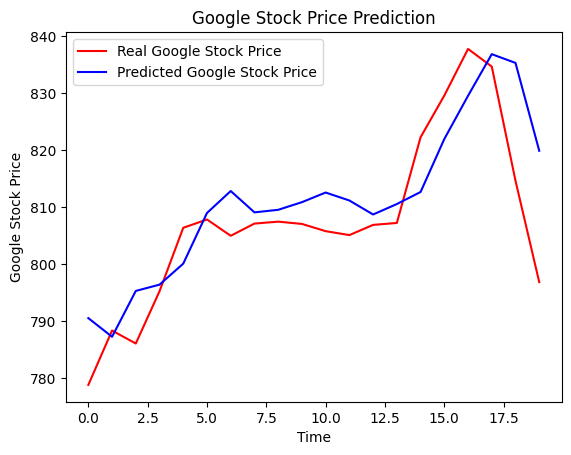

In [42]:
X_test = []
for i in range(timesteps, 70):
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = predicted_stock_price.reshape((predicted_stock_price.shape[0], predicted_stock_price.shape[1])) # Reshape to (20, 50)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
predicted_stock_price = predicted_stock_price.reshape((predicted_stock_price.shape[0], predicted_stock_price.shape[1],1))

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price[:, 0], color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


Task2: Long Short Term Memory (LSTM) (25 points)
We will use the same dataset for LSTM. LSTM is designed to overcome the vanishing gradient problem of RNN. RNN is not commonly used due to that problem. Instead, LSTM is used. We will implement it in this section.


In [39]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [41]:
model = Sequential()
model.add(LSTM(50, activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(LSTM(50, activation='tanh', return_sequences = True))
model.add(LSTM(50, activation='tanh' ))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


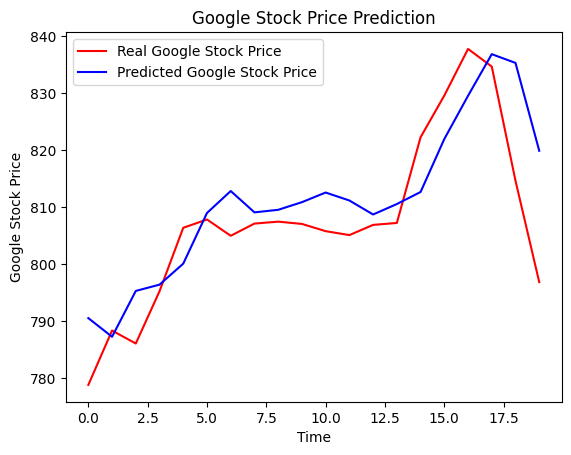

In [43]:
X_test = []
for i in range(timesteps, 70):
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = predicted_stock_price.reshape((predicted_stock_price.shape[0], predicted_stock_price.shape[1])) # Reshape to (20, 50)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
predicted_stock_price = predicted_stock_price.reshape((predicted_stock_price.shape[0], predicted_stock_price.shape[1],1))

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price[:, 0], color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


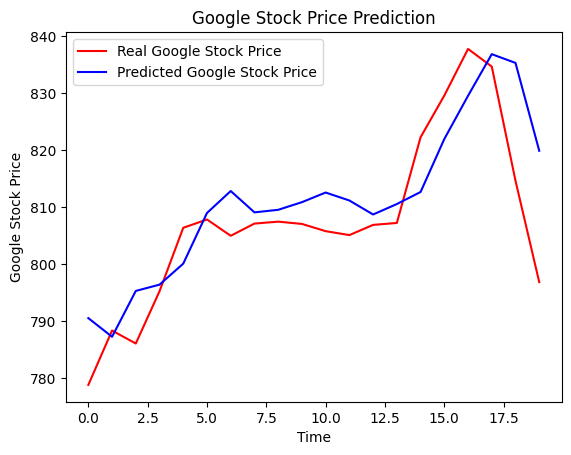

In [44]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price[:, 0], color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


In [45]:
regressor = Sequential()

# Adding the first RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))

# Adding a second RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))

# Adding a fourth RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 30, batch_size = 32)


Epoch 1/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.1977
Epoch 2/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0012
Epoch 3/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 8.1468e-04
Epoch 4/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 6.3867e-04
Epoch 5/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 7.4598e-04
Epoch 6/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 8.1042e-04
Epoch 7/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0010
Epoch 8/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0010
Epoch 9/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 6.0150e-04
Epoch 10/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 8.1495e-04
Epoch 11/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 6.6010e-04
Epoch 12/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 5.4767e-04
Epoch 13/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 5.5225e-04
Epoch 14/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 5.0256e-04
Epoch 15/30
38/38 ━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 929ms/step


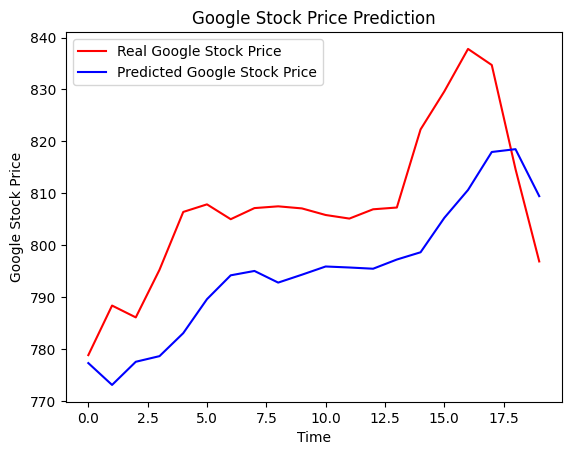

In [46]:
X_test = []
for i in range(timesteps, 70):
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = predicted_stock_price.reshape((predicted_stock_price.shape[0], predicted_stock_price.shape[1])) # Reshape to (20, 50)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
predicted_stock_price = predicted_stock_price.reshape((predicted_stock_price.shape[0], predicted_stock_price.shape[1],1))

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price[:, 0], color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


In [48]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

model = Sequential()
model.add(LSTM(50, activation='tanh', input_shape = (X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs = 50, batch_size = 32)




Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.1082
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0028
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0011
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0011
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 9.8736e-04
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0011
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0011
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0012
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0011
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0011
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0013
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 9.2313e-04
Epoch 13/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0010
Epoch 14/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 9.4774e-04
Epoch 15/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss:

In [49]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

train = pd.read_csv("image_train.csv")

In [50]:
# put labels into y_train variable
Y_train = train["label"]
# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1)


In [51]:
Y_train.value_counts()

,count
label,
1,2503
3,2332
7,2330
2,2255
6,2218
9,2205
4,2198
0,2176
8,2141


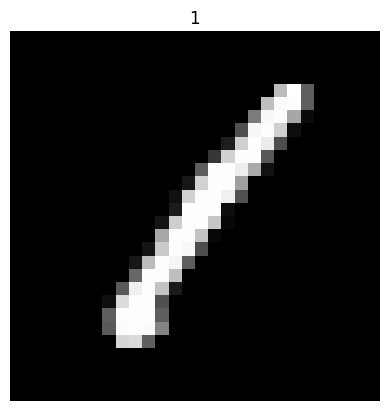

In [52]:
# plot some samples
img = X_train.iloc[0].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

In [53]:
# Normalize the data
X_train = X_train / 255.0
# Reshape
X_train = X_train.values.reshape(-1,28,28,1)
# Label Encoding
from keras.utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 10)



In [54]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)


In [55]:
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()


In [56]:
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


In [57]:
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

# Define the optimizer
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

epochs = 10  # for better result increase the epochs
batch_size = 250


In [58]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)


In [59]:
history = model.fit(datagen.flow(X_train,Y_train, batch_size=batch_size), epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 28s 312ms/step - accuracy: 0.1807 - loss: nan - val_accuracy: 0.0894 - val_loss: nan
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.1000 - loss: nan - val_accuracy: 0.0894 - val_loss: nan
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 31s 367ms/step - accuracy: 0.1009 - loss: nan - val_accuracy: 0.0894 - val_loss: nan
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0720 - loss: nan - val_accuracy: 0.0894 - val_loss: nan
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 21s 259ms/step - accuracy: 0.0970 - loss: nan - val_accuracy: 0.0894 - val_loss: nan
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1440 - loss: nan - val_accuracy: 0.0894 - val_loss: nan
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 19s 234ms/step - accuracy: 0.0967 - loss: nan - val_accuracy: 0.0894 - val_loss: nan
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0920 - loss: nan - val_accuracy: 0.0894 - val_loss: nan
Epoch 9/10
80/80 ━━━━━━━━━━

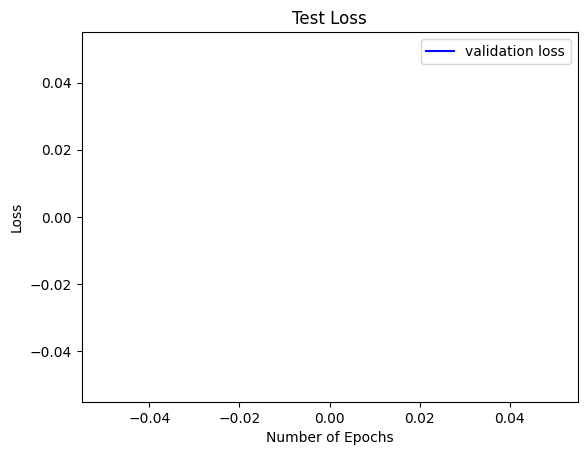

In [60]:
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


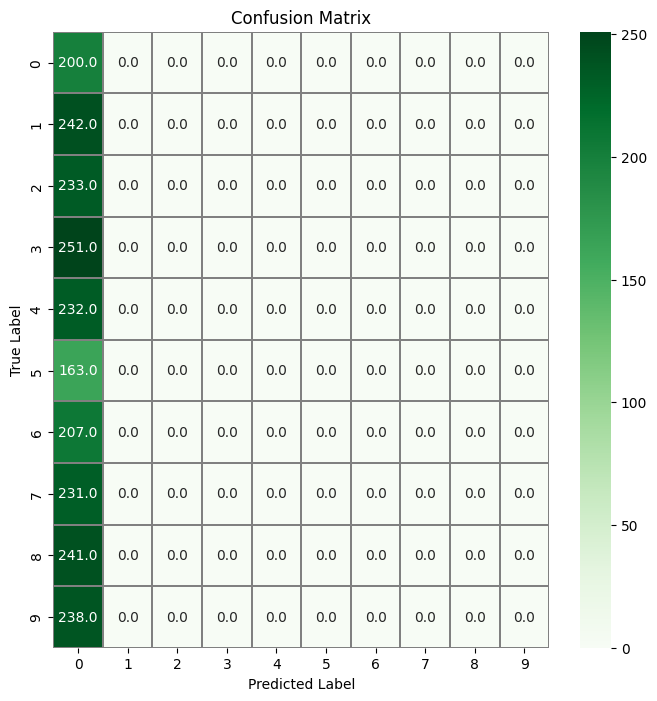

In [61]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [62]:
from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_pred_classes))


              precision    recall  f1-score   support

           0       0.09      1.00      0.16       200
           1       0.00      0.00      0.00       242
           2       0.00      0.00      0.00       233
           3       0.00      0.00      0.00       251
           4       0.00      0.00      0.00       232
           5       0.00      0.00      0.00       163
           6       0.00      0.00      0.00       207
           7       0.00      0.00      0.00       231
           8       0.00      0.00      0.00       241
           9       0.00      0.00      0.00       238

    accuracy                           0.09      2238
   macro avg       0.01      0.10      0.02      2238
weighted avg       0.01      0.09      0.01      2238

